<a href="https://colab.research.google.com/github/Subhi7/Building-graph-viz-to-analyze-spread-of-misinformation/blob/main/Graphviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

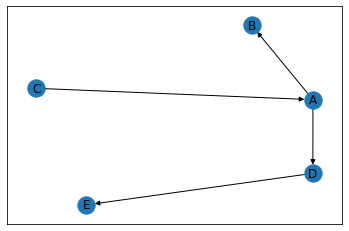

In [ ]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)


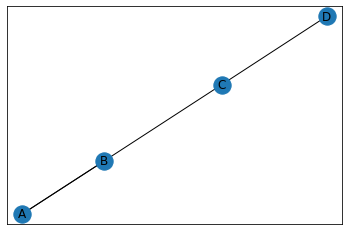

In [ ]:
G = nx.MultiGraph()
G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C',relation='friend')
# plt.figure(figsize = (10, 10))
# nx.draw(G, with_labels = True, node_size = 1000, font_size = 20)
# plt.show()
nx.draw_networkx(G)

In [ ]:
G.edges()
nx.degree(G, 'A')


2

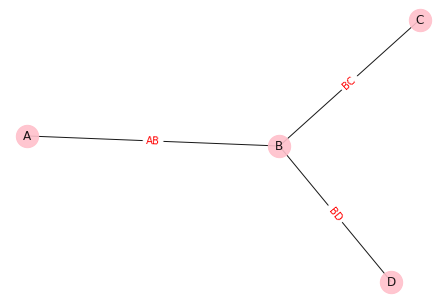

In [ ]:
edges = [['A','B'],['B','C'],['B','D']]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure()    
nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\
labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels={('A','B'):'AB',\
('B','C'):'BC',('B','D'):'BD'},font_color='red')
plt.axis('off')
plt.show()

In [4]:
sample_input_data = pd.read_csv('request1_0.csv')
temp = ['fake']*100
temp2 = ['real']*400
temp.extend(temp2)

sample_input_data['label'] = temp

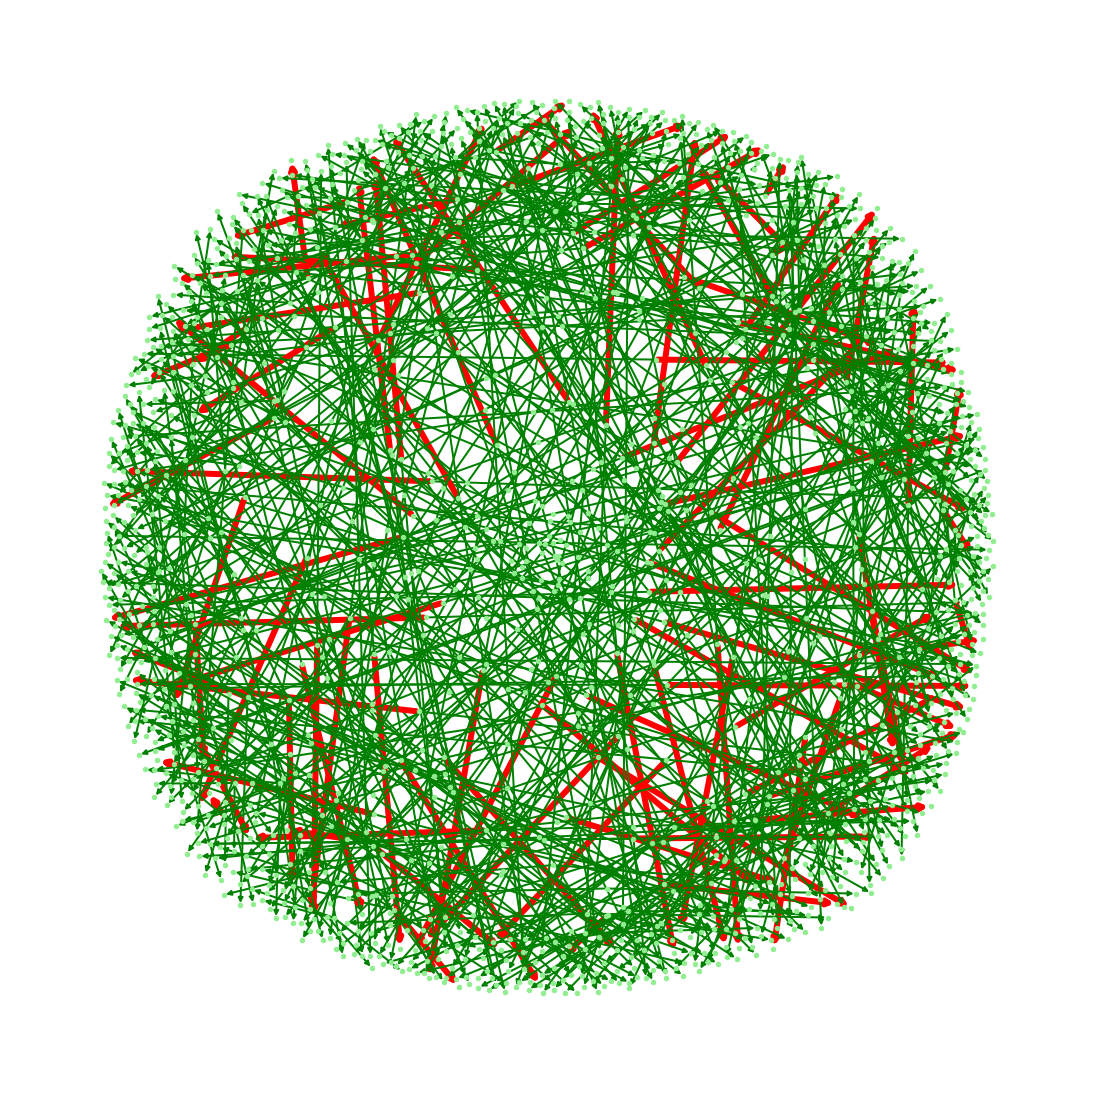

In [5]:
G_asymmetric = nx.DiGraph()

for ind in sample_input_data[:1000].index:
  if(sample_input_data['label'][ind] == 'fake'):
    G_asymmetric.add_edge(sample_input_data['id'][ind],sample_input_data['user_id'][ind], color='r',weight=6, node_size=40)
  else:
    G_asymmetric.add_edge(sample_input_data['id'][ind],sample_input_data['user_id'][ind], color='g',weight=2, node_size=40)
  if(sample_input_data['in_reply_to_user_id'][ind] != ""):
    G_asymmetric.add_edge(sample_input_data['id'][ind],sample_input_data['in_reply_to_user_id'][ind], color='g',weight=2, node_size=20)

pos = nx.spring_layout(G_asymmetric)
# pos = nx.circular_layout(G_asymmetric)


plt.figure(figsize = (15, 15))
# nx.draw(G_asymmetric, with_labels = False, node_size = 20, font_size = 20)
colors = nx.get_edge_attributes(G_asymmetric,'color').values()
weights = nx.get_edge_attributes(G_asymmetric,'weight').values()
node_sizes = nx.get_edge_attributes(G_asymmetric,'node_size').values()

nx.draw(G_asymmetric, pos, 
        edge_color=colors, 
        width=list(weights),
        with_labels=False,
        node_color='lightgreen',
        node_size = 20
        )
plt.show()
# nx.draw_networkx(G_asymmetric)

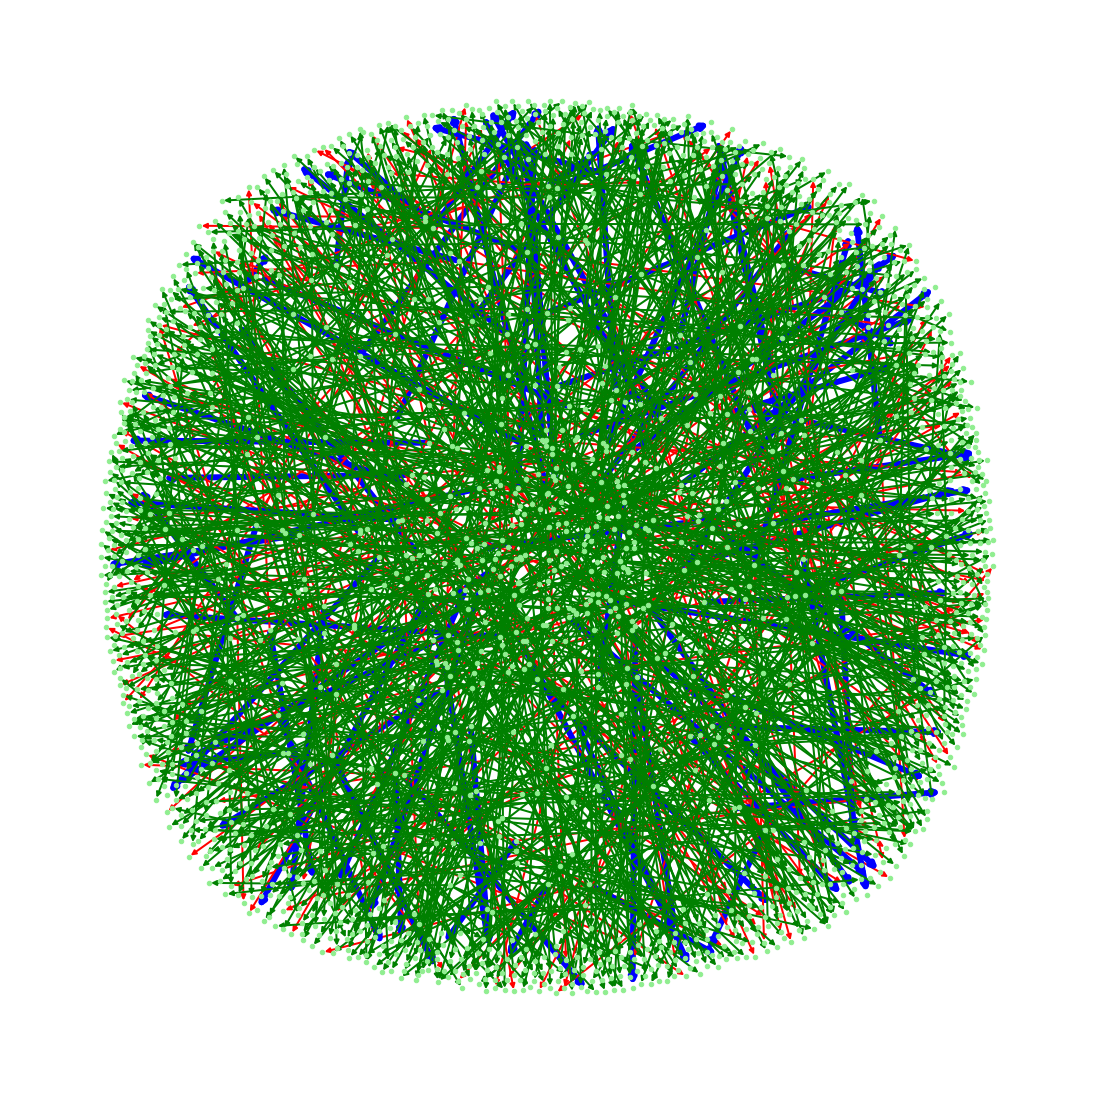

In [53]:
G_asymmetric = nx.DiGraph()

for i in range(len(sample_input_data)):
  if (sample_input_data.iloc[i]['label'] == 'fake'):
    G_asymmetric.add_edge(sample_input_data.iloc[i]['id'],sample_input_data.iloc[i]['user_id'], color='r',weight=2, node_size=40)
    if(sample_input_data['in_reply_to_user_id'][i] != ""):
      G_asymmetric.add_edge(sample_input_data.iloc[i]['id'],sample_input_data.iloc[i]['in_reply_to_user_id'], color='r',weight=2, node_size=40)
    if not pd.isna(sample_input_data.iloc[i]['references']):
      for e in sample_input_data.iloc[i]['references'][2:-2].split("', '"):
        G_asymmetric.add_edge(sample_input_data.iloc[i]['id'],int(json.loads(e)['id']), color='b',weight=6, node_size=40)

  else:
    G_asymmetric.add_edge(sample_input_data.iloc[i]['id'],sample_input_data.iloc[i]['user_id'], color='g',weight=2, node_size=40)
    if(sample_input_data['in_reply_to_user_id'][i] != ""):
      G_asymmetric.add_edge(sample_input_data.iloc[i]['id'],sample_input_data.iloc[i]['in_reply_to_user_id'], color='g',weight=2, node_size=40)
    if not pd.isna(sample_input_data.iloc[i]['references']):
      for e in sample_input_data.iloc[i]['references'][2:-2].split("', '"):
        G_asymmetric.add_edge(sample_input_data.iloc[i]['id'],json.loads(e)['id'], color='g',weight=2, node_size=40)

pos = nx.spring_layout(G_asymmetric)
# pos = nx.circular_layout(G_asymmetric)

plt.figure(figsize = (15, 15))
# nx.draw(G_asymmetric, with_labels = False, node_size = 20, font_size = 20)
colors = nx.get_edge_attributes(G_asymmetric,'color').values()
weights = nx.get_edge_attributes(G_asymmetric,'weight').values()
node_sizes = nx.get_edge_attributes(G_asymmetric,'node_size').values()

nx.draw(G_asymmetric, pos, 
        edge_color=colors, 
        width=list(weights),
        with_labels=False,
        node_color='lightgreen',
        node_size = 20
        )
plt.show()
# nx.draw_networkx(G_asymmetric)


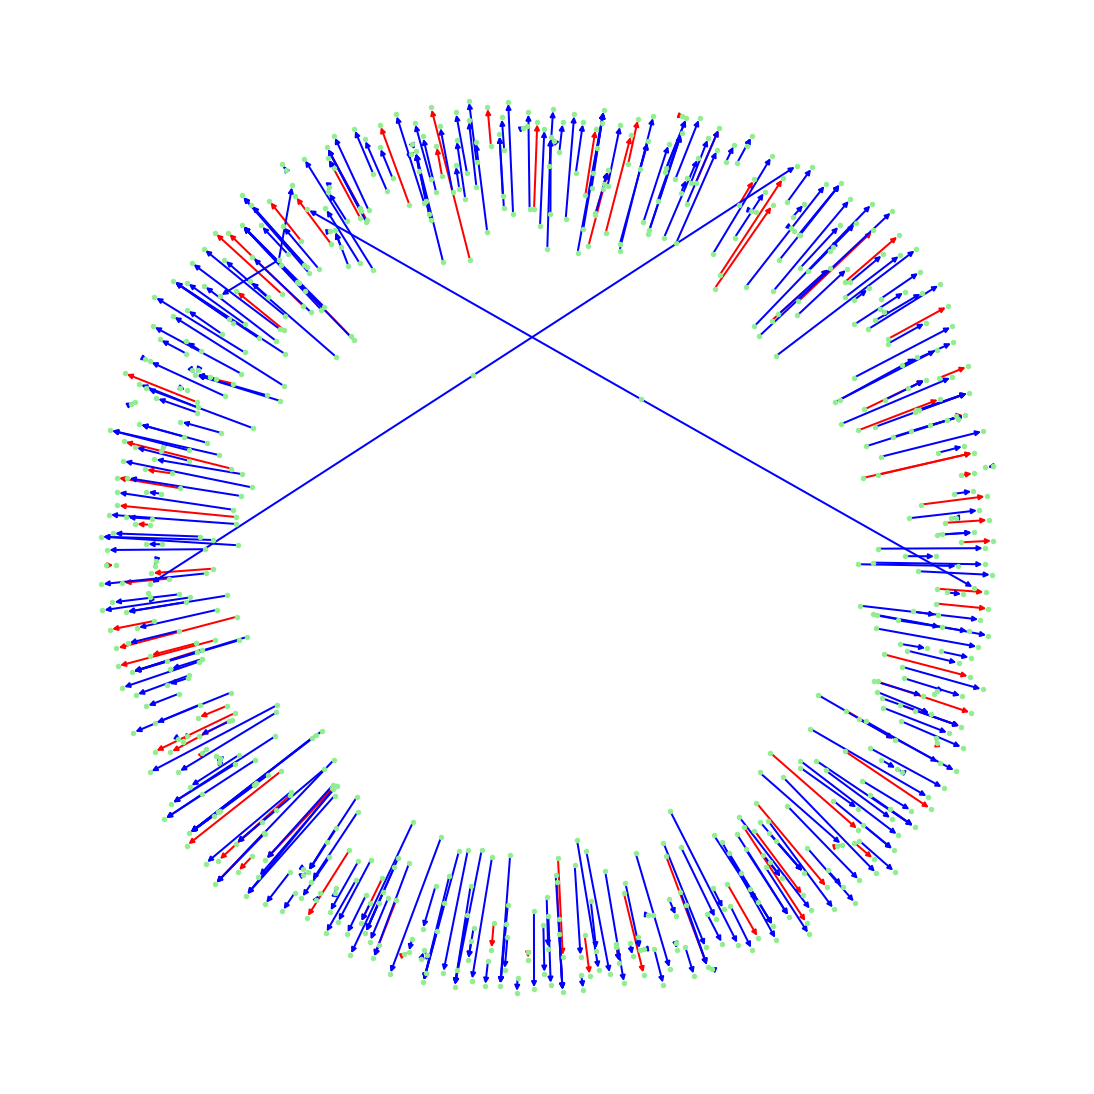

In [34]:
#GRAPH SHOWING RELATIONSHIP BETWEEN TWEETS:

G_asymmetric = nx.DiGraph()

for i in range(len(sample_input_data)):
  if (sample_input_data.iloc[i]['label'] == 'fake'):
    if not pd.isna(sample_input_data.iloc[i]['references']):
      for e in sample_input_data.iloc[i]['references'][2:-2].split("', '"):
        G_asymmetric.add_edge(sample_input_data.iloc[i]['id'],int(json.loads(e)['id']), color='r',weight=2, node_size=40)

  else:
    if not pd.isna(sample_input_data.iloc[i]['references']):
      for e in sample_input_data.iloc[i]['references'][2:-2].split("', '"):
        G_asymmetric.add_edge(sample_input_data.iloc[i]['id'],int(json.loads(e)['id']), color='b',weight=2, node_size=40)

pos = nx.spring_layout(G_asymmetric)

plt.figure(figsize = (15, 15))
# nx.draw(G_asymmetric, with_labels = False, node_size = 20, font_size = 20)
colors = nx.get_edge_attributes(G_asymmetric,'color').values()
weights = nx.get_edge_attributes(G_asymmetric,'weight').values()
node_sizes = nx.get_edge_attributes(G_asymmetric,'node_size').values()

nx.draw(G_asymmetric, pos, 
        edge_color=colors, 
        width=list(weights),
        with_labels=False,
        node_color='lightgreen',
        node_size = 20
        )
plt.show()
# nx.draw_networkx(G_asymmetric)



The edge density is: 0.0007225564866486104
The average degree is 1.1734317343173433


Text(0.5, 1.0, 'Node Degree')

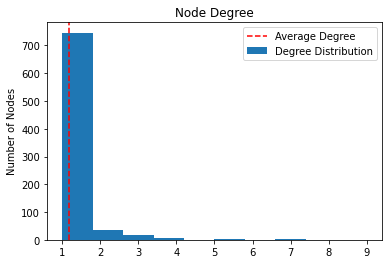

In [35]:
#GRAPH ANALYTICS (https://deepnote.com/@deepnote/An-Introduction-to-Social-Network-Analysis-with-NetworkX-Two-Factions-of-a-Karate-Club-w4wQvz-rTpeKZpx8DrlyrQ)

density = nx.density(G_asymmetric)
print('The edge density is: ' + str(density))

#the degree function in networkx returns a DegreeView object capable of iterating through (node, degree) pairs
degree = G_asymmetric.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

#we now plot the degree distribution to get a better insight
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Node Degree')


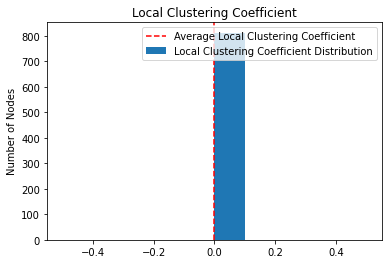

In [36]:
#Now we can compute the local clustering coefficient
local_clustering_coefficient = nx.algorithms.cluster.clustering(G_asymmetric)

#lets find the average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)

#similarly to the degree lets plot the local clustering coefficient distribution
plt.hist(local_clustering_coefficient.values(),label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()

In [43]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
G_commasymmetric = nx.Graph(G_asymmetric)
#preform the community detection
c = list(greedy_modularity_communities(G_commasymmetric))


#Let's find out how many communities we detected
print("We have detected", len(c) , "communities")

c.sort(key = len, reverse=True)

#Lets see these 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

We have detected 336 communities
[1365125831727669249, 1365130360628121603, 1365130361349562381, 1365130382174265344, 1365130391749804036, 1365130414386479107, 1365130421483278342, 1365130425555955712, 1365130435722960897, 1365130452080730114]
[1365097757552254977, 1365130376948064264, 1365130405679149060, 1365130421722374146, 1365130422946947074, 1365130432782561286, 1365130440277979137, 1365130453640826882, 1365130486960459776]
[1365099780528037889, 1365130390663536643, 1365130405112913920, 1365130407914713088, 1365130408099201028, 1365130417758556160, 1365130431109152769, 1365130470879617025]


In [52]:
#draw each set of nodes in a seperate colour

pos = nx.circular_layout(G_asymmetric)
club_labels = nx.get_node_attributes(G_asymmetric)

plt.figure(figsize = (15, 15))

nx.draw_networkx_nodes(G_asymmetric,pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(G_asymmetric,pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(G_asymmetric,pos, nodelist=community_2, node_color='b', alpha=0.5)

#now we can add edges to the drawing 
nx.draw_networkx_edges(G_asymmetric,pos,style='dashed',width = 0.2)

# #finally we can add labels to each node corresponding to the final club each member joined 
# nx.draw_networkx_labels(ZKC_graph,circ_pos,club_labels,font_size=9)

plt.show()

TypeError: ignored